In [158]:
import sys
sys.path.insert(0,'../scripts/')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from graph import draw
from data_info import DataInfo

In [51]:
db = pd.read_csv('../data/cleaner_telecom.csv', na_values=['?', None])
db.head()

,Unnamed: 0,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total_Uploads,Total_Downloads,Uploads,Downloads,Youtube_Total_Data,...,Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI,Total UL and DL,Start,End,Avg Delay (ms),Activity_Duration(ms)
0,0,3.360100e+10,1,36.749740,480.62408,36.749740,480.62408,36.749740,480.62408,18.355944,...,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13,345.62940,2019-04-04 12:01:18,2019-04-25 14:35:31,47.0,76.410995
1,1,3.360100e+10,1,53.800392,1180.28920,53.800392,1180.28920,53.800392,1180.28920,39.359123,...,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13,707.18536,2019-04-09 13:04:04,2019-04-25 08:15:48,70.0,3.728000
2,2,3.360100e+10,1,27.883638,690.49994,27.883638,690.49994,27.883638,690.49994,34.425236,...,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13,307.69098,2019-04-09 17:42:11,2019-04-25 11:58:13,50.0,0.000000
3,3,3.360101e+10,1,43.324220,1595.06840,43.324220,1595.06840,43.324220,1595.06840,36.534767,...,undefined,undefined,T21824A,2.082014e+14,3.535661e+13,889.35270,2019-04-10 00:31:25,2019-04-25 07:36:35,50.0,41.211998
4,4,3.360101e+10,2,38.542816,1119.84810,38.542816,1119.84810,38.542816,1119.84810,34.222250,...,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13,607.68140,2019-04-12 20:10:23,2019-04-25 10:40:32,50.0,0.000000


# Exploring Data

In [30]:
#we have to see the outline of the data before cleaning
db.columns.tolist()

['Unnamed: 0',
 'MSISDN/Number',
 'no.of xDR sessions',
 'Total Uploads',
 'Total Downloads',
 'Total_Uploads',
 'Total_Downloads',
 'Uploads',
 'Downloads',
 'Youtube_Total_Data',
 'Google_Total_Data',
 'Email_Total_Data',
 'Social_Media_Total_Data',
 'Netflix_Total_Data',
 'Gaming_Total_Data',
 'Other_Total_Data',
 'Avg Throughput (kbps)',
 'Handset Manufacturer',
 'Handset Type',
 'Last Location Name',
 'IMSI',
 'IMEI',
 'Total UL and DL',
 'Start',
 'End',
 'Avg Delay (ms)',
 'Activity_Duration(ms)']

In [31]:
#explore the various data points by describing the data
db.shape

(106856, 27)

# Handling Missing values

In [32]:
def percent_missing(df):
    total_cells= np.product(df.shape)       #total number of cells in the dataframe
    
    missing_count= df.isnull().sum()        #sum of empty cells  per column
    
    totally_missing = missing_count.sum()   #total of all missing in the dataframe 
    
    print("The Dataset contains", round(((totally_missing/total_cells) * 100), 2), "%", "missing values.")  #totally_missing percentage

percent_missing(db)
    
    

The Dataset contains 0.0 % missing values.


# Transforming Data

In [33]:
#SCALING
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1106,129.496591
1894,11.732351
818,92.907625
917,14.798014
1330,267.868470


In [34]:
original_data[0].min(), original_data[0].max()

(0.08606829135925231, 1541.0096677053505)

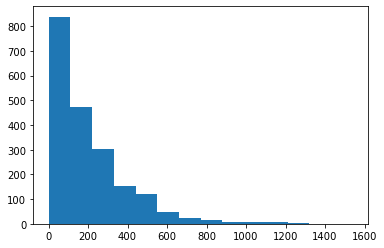

In [35]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

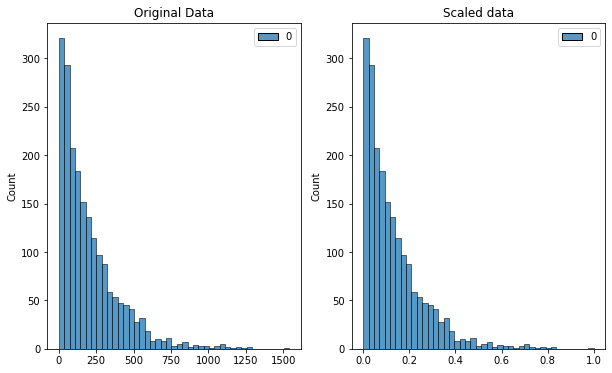

In [36]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

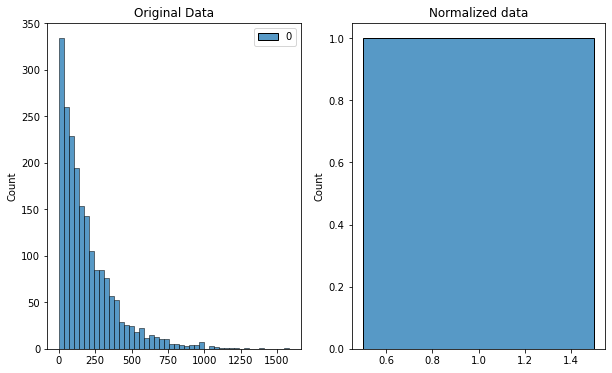

In [12]:
#NORMALIZATION

from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [37]:
# check datatypes
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               106856 non-null  int64  
 1   MSISDN/Number            106856 non-null  float64
 2   no.of xDR sessions       106856 non-null  int64  
 3   Total Uploads            106856 non-null  float64
 4   Total Downloads          106856 non-null  float64
 5   Total_Uploads            106856 non-null  float64
 6   Total_Downloads          106856 non-null  float64
 7   Uploads                  106856 non-null  float64
 8   Downloads                106856 non-null  float64
 9   Youtube_Total_Data       106856 non-null  float64
 10  Google_Total_Data        106856 non-null  float64
 11  Email_Total_Data         106856 non-null  float64
 12  Social_Media_Total_Data  106856 non-null  float64
 13  Netflix_Total_Data       106856 non-null  float64
 14  Gami

# Exploration 

In [38]:
dfExp = db.copy()
dfExp

,Unnamed: 0,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total_Uploads,Total_Downloads,Uploads,Downloads,Youtube_Total_Data,...,Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI,Total UL and DL,Start,End,Avg Delay (ms),Activity_Duration(ms)
0,0,3.360100e+10,1,36.749740,480.62408,36.749740,480.62408,36.749740,480.62408,18.355944,...,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13,345.62940,2019-04-04 12:01:18,2019-04-25 14:35:31,47.0,76.410995
1,1,3.360100e+10,1,53.800392,1180.28920,53.800392,1180.28920,53.800392,1180.28920,39.359123,...,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13,707.18536,2019-04-09 13:04:04,2019-04-25 08:15:48,70.0,3.728000
2,2,3.360100e+10,1,27.883638,690.49994,27.883638,690.49994,27.883638,690.49994,34.425236,...,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13,307.69098,2019-04-09 17:42:11,2019-04-25 11:58:13,50.0,0.000000
3,3,3.360101e+10,1,43.324220,1595.06840,43.324220,1595.06840,43.324220,1595.06840,36.534767,...,undefined,undefined,T21824A,2.082014e+14,3.535661e+13,889.35270,2019-04-10 00:31:25,2019-04-25 07:36:35,50.0,41.211998
4,4,3.360101e+10,2,38.542816,1119.84810,38.542816,1119.84810,38.542816,1119.84810,34.222250,...,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13,607.68140,2019-04-12 20:10:23,2019-04-25 10:40:32,50.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,106851,3.379000e+10,1,50.528850,871.01940,50.528850,871.01940,50.528850,871.01940,24.109232,...,Apple,Apple iPhone 6 Plus (A1524),D79698A,2.082017e+14,3.592491e+13,349.05720,2019-04-27 12:29:02,2019-04-29 10:52:19,1106.0,15.715000
106852,106852,3.379000e+10,1,43.206300,956.12280,43.206300,956.12280,43.206300,956.12280,23.704700,...,Apple,Apple iPhone 6S (A1688),D72312C,2.082015e+14,3.561371e+13,197.80980,2019-04-27 12:29:08,2019-04-29 08:23:38,39.0,80.697010
106853,106853,3.197021e+12,1,41.173542,655.69380,41.173542,655.69380,41.173542,655.69380,23.619537,...,undefined,undefined,L35995B,2.082019e+14,3.536981e+13,132.33066,2019-04-27 12:29:20,2019-04-29 12:06:29,50.0,0.000000
106854,106854,3.370000e+14,1,49.497055,832.70605,49.497055,832.70605,49.497055,832.70605,36.713303,...,Apple,Apple iPhone 8 Plus (A1897),T40137A,2.082010e+14,3.594021e+13,422.91077,2019-04-27 12:29:22,2019-04-29 09:55:38,45.0,44.640003


In [41]:
dfExp.dtypes

Unnamed: 0                   int64
MSISDN/Number              float64
no.of xDR sessions           int64
Total Uploads              float64
Total Downloads            float64
Total_Uploads              float64
Total_Downloads            float64
Uploads                    float64
Downloads                  float64
Youtube_Total_Data         float64
Google_Total_Data          float64
Email_Total_Data           float64
Social_Media_Total_Data    float64
Netflix_Total_Data         float64
Gaming_Total_Data          float64
Other_Total_Data           float64
Avg Throughput (kbps)      float64
Handset Manufacturer        object
Handset Type                object
Last Location Name          object
IMSI                       float64
IMEI                       float64
Total UL and DL            float64
Start                       object
End                         object
Avg Delay (ms)             float64
Activity_Duration(ms)      float64
dtype: object

# Univariate Analysis

# Non Graphical

In [166]:
explore = DataInfo(dfExp['Social_Media_Total_Data'])
explore.get_description()

count    106856.000000
mean          1.829234
std           1.035324
min           0.002003
25%           0.934775
50%           1.827609
75%           2.725867
max           3.650861
Name: Social_Media_Total_Data, dtype: float64

In [167]:
explore = DataInfo(dfExp['Google_Total_Data'])
explore.get_description()

count    106856.000000
mean          7.807186
std           3.518899
min           0.040330
25%           4.938135
50%           7.815112
75%          10.683716
max          15.528782
Name: Google_Total_Data, dtype: float64

In [168]:
explore = DataInfo(dfExp['Email_Total_Data'])
explore.get_description()

count    106856.000000
mean          2.256312
std           1.070585
min           0.008359
25%           1.356211
50%           2.261322
75%           3.156983
max           4.518036
Name: Email_Total_Data, dtype: float64

In [169]:
explore = DataInfo(dfExp['Youtube_Total_Data'])
explore.get_description()

count    106856.000000
mean         22.614316
std           9.247766
min           0.129655
25%          15.985354
50%          22.631867
75%          29.251762
max          45.190080
Name: Youtube_Total_Data, dtype: float64

In [170]:
explore = DataInfo(dfExp['Netflix_Total_Data'])
explore.get_description()

count    106856.000000
mean         22.638882
std           9.263578
min           0.098432
25%          15.991677
50%          22.636227
75%          29.312655
max          45.198150
Name: Netflix_Total_Data, dtype: float64

In [171]:
explore = DataInfo(dfExp['Gaming_Total_Data'])
explore.get_description()

count    106856.000000
mean        430.689273
std         244.159453
min           0.595375
25%         218.995712
50%         431.739040
75%         641.892400
max         859.202800
Name: Gaming_Total_Data, dtype: float64

In [172]:
explore = DataInfo(dfExp['no.of xDR sessions'])
explore.get_description()

count    106856.000000
mean          1.403768
std           3.358017
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1067.000000
Name: no.of xDR sessions, dtype: float64

In [175]:
explore = DataInfo(dfExp['Total UL and DL'])
explore.get_description()

count    106856.000000
mean        496.100057
std         244.534250
min          28.956106
25%         284.870525
50%         497.179230
75%         707.379402
max         955.984740
Name: Total UL and DL, dtype: float64

In [177]:
explore = DataInfo(dfExp['Total_Downloads'])
explore.get_description()

count    106856.000000
mean        875.511664
std         344.359674
min          15.169477
25%         628.089388
50%         876.062450
75%        1123.551200
max        1735.682900
Name: Total_Downloads, dtype: float64

In [178]:
explore = DataInfo(dfExp['Total_Uploads'])
explore.get_description()

count    106856.000000
mean         41.106006
std          11.296771
min           4.469240
25%          33.169444
50%          41.120886
75%          49.024604
max          78.331314
Name: Total_Uploads, dtype: float64

# Graphical

## Total UL and DL

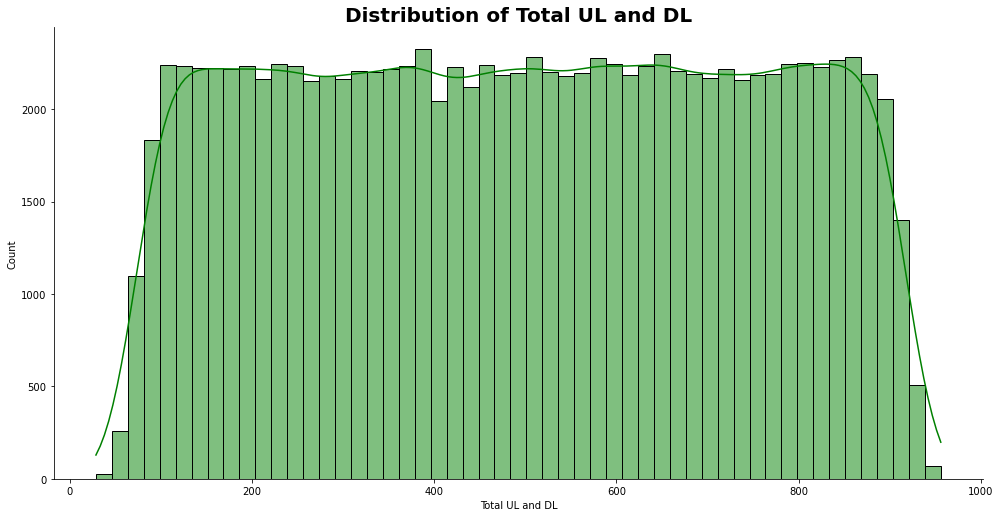

In [56]:
draw.plot_hist(dfExp, 'Total UL and DL', 'green')

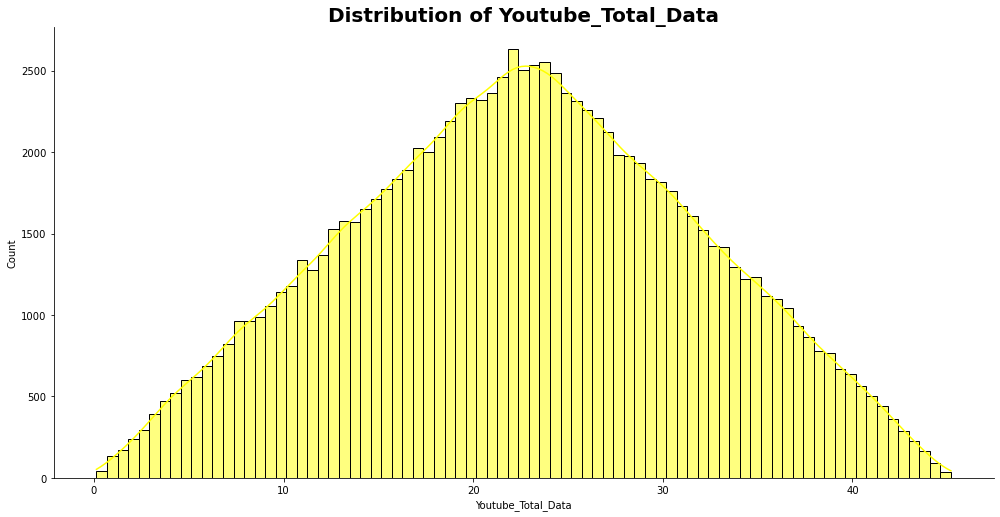

In [58]:
#youtube total data
draw.plot_hist(dfExp, 'Youtube_Total_Data', 'yellow')

In [60]:
dfExp.describe()['Youtube_Total_Data']

count    106856.000000
mean         22.614316
std           9.247766
min           0.129655
25%          15.985354
50%          22.631867
75%          29.251762
max          45.190080
Name: Youtube_Total_Data, dtype: float64

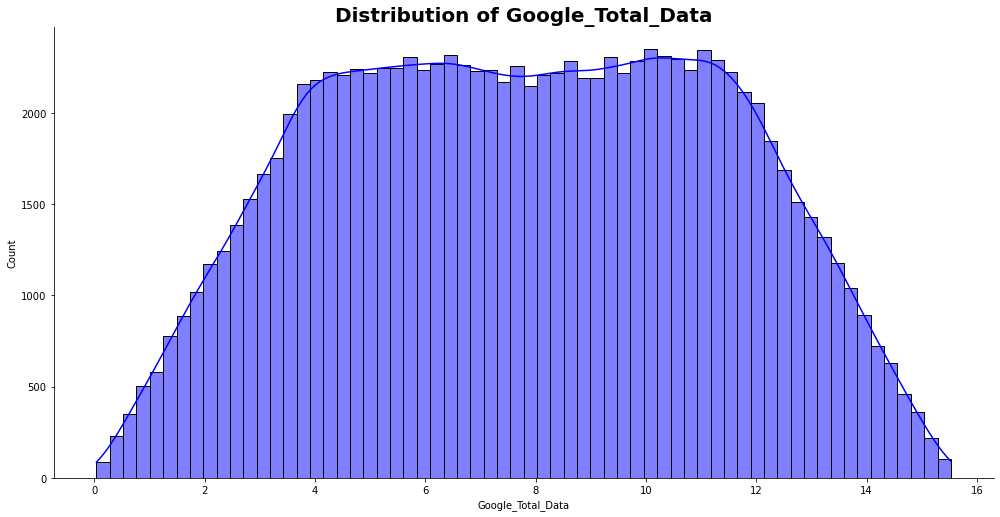

In [63]:
draw.plot_hist(dfExp, 'Google_Total_Data', 'blue')

In [64]:
dfExp.describe()['Google_Total_Data']

count    106856.000000
mean          7.807186
std           3.518899
min           0.040330
25%           4.938135
50%           7.815112
75%          10.683716
max          15.528782
Name: Google_Total_Data, dtype: float64

# Email Data

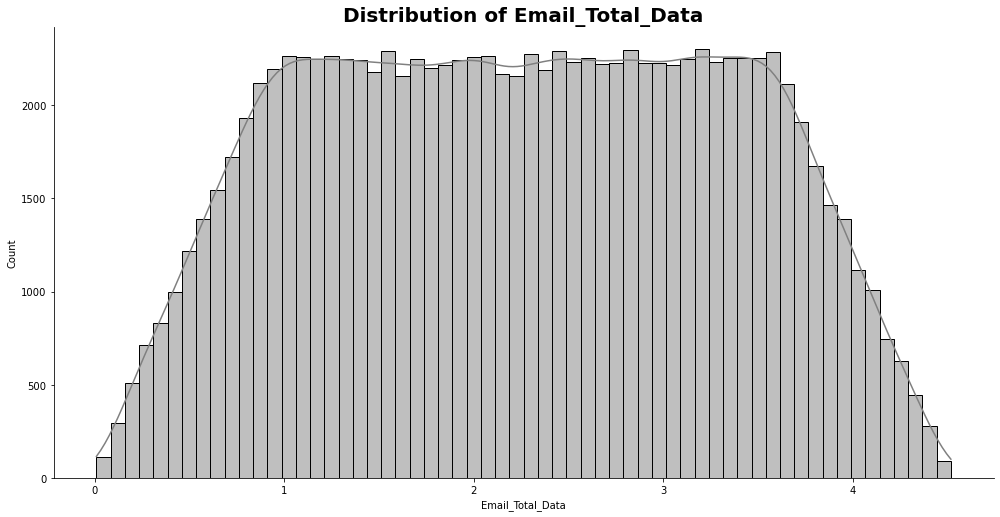

In [66]:
draw.plot_hist(dfExp, 'Email_Total_Data', 'gray')

In [67]:
dfExp.describe()['Email_Total_Data']

count    106856.000000
mean          2.256312
std           1.070585
min           0.008359
25%           1.356211
50%           2.261322
75%           3.156983
max           4.518036
Name: Email_Total_Data, dtype: float64

# social media data

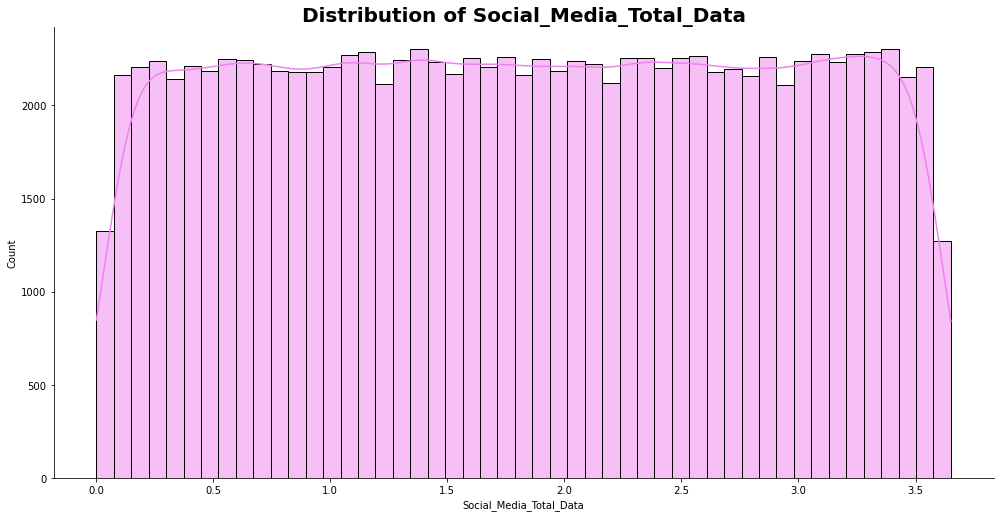

In [71]:
draw.plot_hist(dfExp, 'Social_Media_Total_Data', 'violet')

# Netflix data

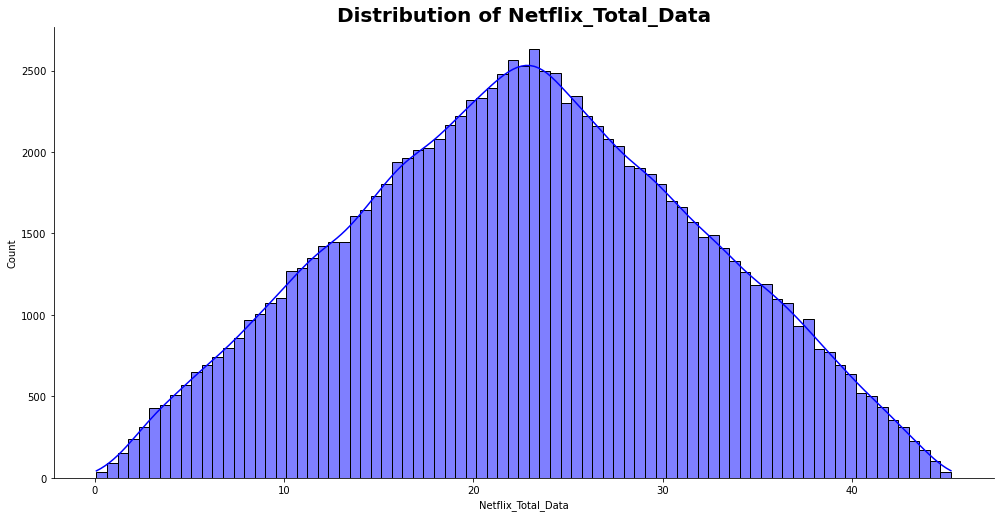

In [72]:
draw.plot_hist(dfExp, 'Netflix_Total_Data', 'blue')

In [74]:
dfExp.describe()['Netflix_Total_Data']

count    106856.000000
mean         22.638882
std           9.263578
min           0.098432
25%          15.991677
50%          22.636227
75%          29.312655
max          45.198150
Name: Netflix_Total_Data, dtype: float64

# Gaming data

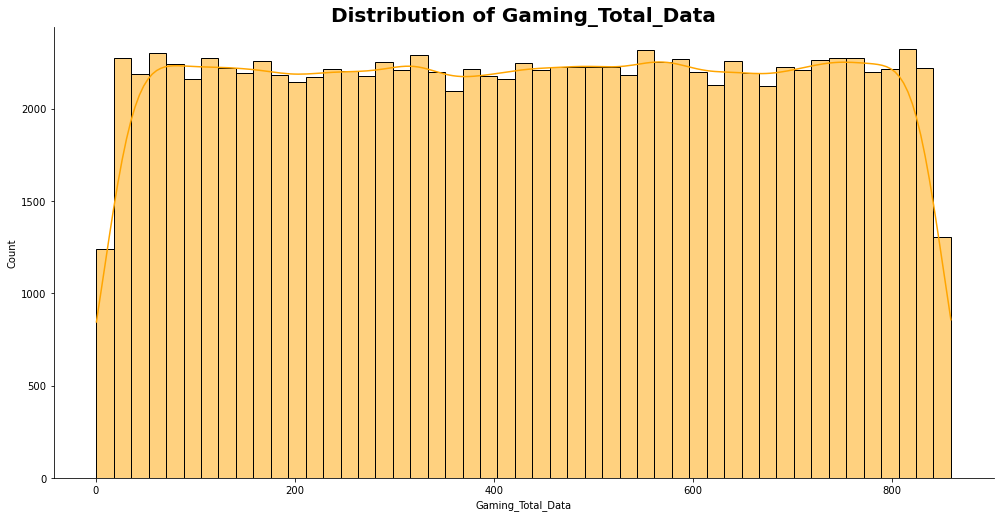

In [77]:
draw.plot_hist(dfExp, 'Gaming_Total_Data', 'orange')

In [78]:
dfExp.describe()['Gaming_Total_Data']

count    106856.000000
mean        430.689273
std         244.159453
min           0.595375
25%         218.995712
50%         431.739040
75%         641.892400
max         859.202800
Name: Gaming_Total_Data, dtype: float64

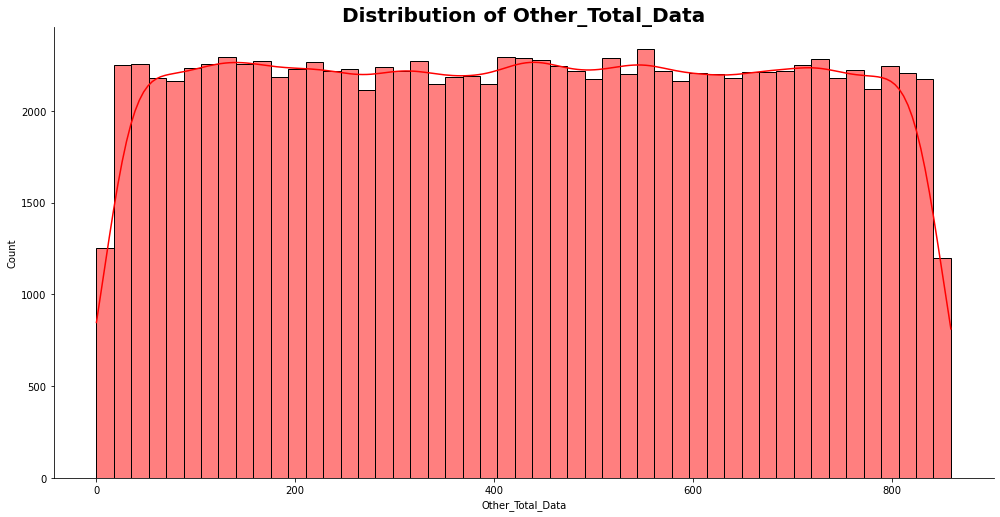

In [79]:
draw.plot_hist(dfExp, 'Other_Total_Data', 'red')

# Bivariate Analysis

It involves the analysis of two variables (often denoted as X, Y), 
for the purpose of determining the empirical relationship between them.

The scatter diagram or scatter plot is the workhorse bivariate plot, and is probably the plot type that is most frequently generated in practice 


# social media vs Total UL and DL

<AxesSubplot:xlabel='Social_Media_Total_Data', ylabel='Total UL and DL'>

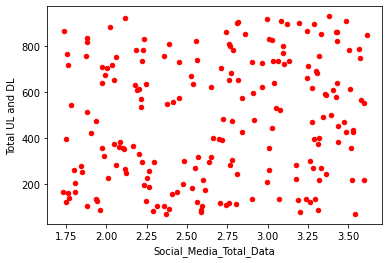

In [94]:
dfExp[dfExp['Social_Media_Total_Data'] > 1.72].sample(200).plot.scatter(x='Social_Media_Total_Data', y='Total UL and DL', c='red', s=20)

# Youtube Total Data Vs Total UL and DL

<AxesSubplot:xlabel='Youtube_Total_Data', ylabel='Total UL and DL'>

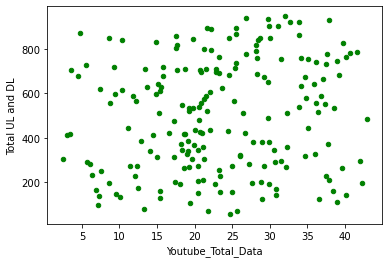

In [93]:
dfExp[dfExp['Youtube_Total_Data'] > 1.72].sample(200).plot.scatter(x='Youtube_Total_Data', y='Total UL and DL', c='green', s=20)

# Google Total Data Vs Total UL DL

<AxesSubplot:xlabel='Google_Total_Data', ylabel='Total UL and DL'>

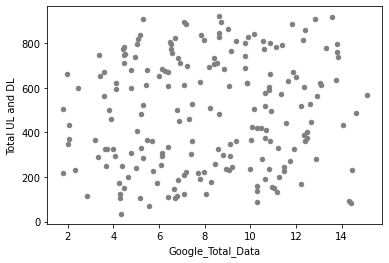

In [92]:
dfExp[dfExp['Google_Total_Data'] > 1.72].sample(200).plot.scatter(x='Google_Total_Data', y='Total UL and DL', c='gray', s=20)

# Email Total Data Vs Total DL UL

<AxesSubplot:xlabel='Email_Total_Data', ylabel='Total UL and DL'>

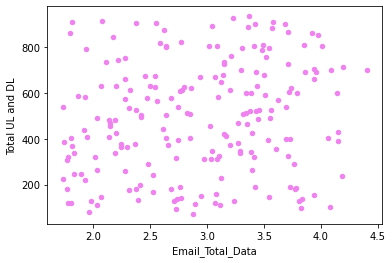

In [95]:
dfExp[dfExp['Email_Total_Data'] > 1.72].sample(200).plot.scatter(x='Email_Total_Data', y='Total UL and DL', c='violet', s=20)

# Netflix Total Data vs Total UL and DL

<AxesSubplot:xlabel='Netflix_Total_Data', ylabel='Total UL and DL'>

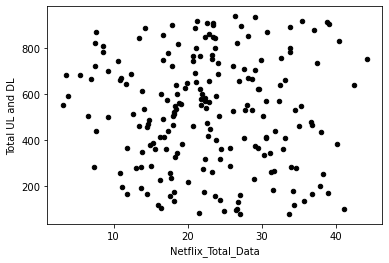

In [97]:
dfExp[dfExp['Netflix_Total_Data'] > 1.72].sample(200).plot.scatter(x='Netflix_Total_Data', y='Total UL and DL', c='black', s=20)


# Gaming Total Data Vs Total UL DL

<AxesSubplot:xlabel='Gaming_Total_Data', ylabel='Total UL and DL'>

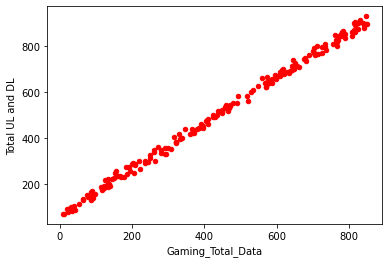

In [100]:
dfExp[dfExp['Gaming_Total_Data'] > 1.72].sample(200).plot.scatter(x='Gaming_Total_Data', y='Total UL and DL', c='red', s=20)

# Other Total Data Vs Total UL DL

<AxesSubplot:xlabel='Other_Total_Data', ylabel='Total UL and DL'>

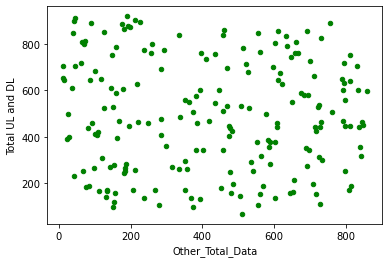

In [102]:
dfExp[dfExp['Other_Total_Data'] > 1.72].sample(200).plot.scatter(x='Other_Total_Data', y='Total UL and DL', c='green', s=20)

# Outlier Diagrams

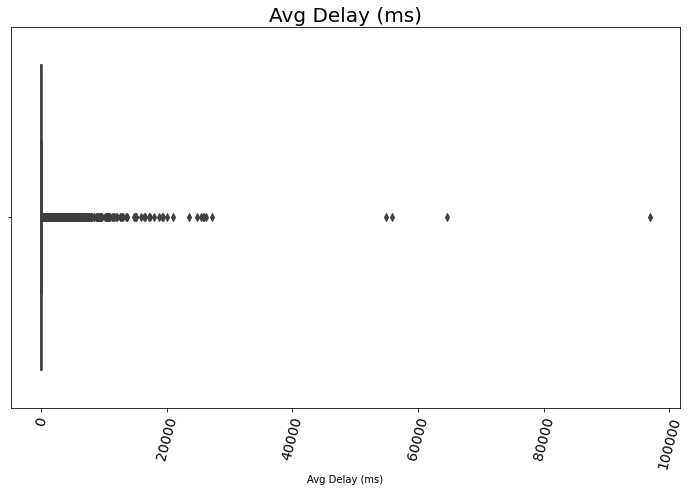

In [108]:
#Average delay
draw.plot_box(dfExp,'Avg Delay (ms)' ,'Avg Delay (ms)')

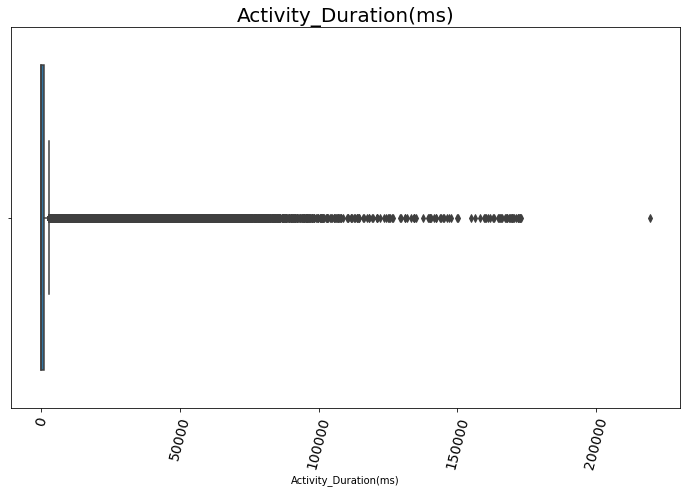

In [109]:
#Average Duration
draw.plot_box(dfExp,'Activity_Duration(ms)' ,'Activity_Duration(ms)')

# Correlation

In [120]:
dfExp.columns

Index(['Unnamed: 0', 'MSISDN/Number', 'no.of xDR sessions', 'Total Uploads',
       'Total Downloads', 'Total_Uploads', 'Total_Downloads', 'Uploads',
       'Downloads', 'Youtube_Total_Data', 'Google_Total_Data',
       'Email_Total_Data', 'Social_Media_Total_Data', 'Netflix_Total_Data',
       'Gaming_Total_Data', 'Other_Total_Data', 'Avg Throughput (kbps)',
       'Handset Manufacturer', 'Handset Type', 'Last Location Name', 'IMSI',
       'IMEI', 'Total UL and DL', 'Start', 'End', 'Avg Delay (ms)',
       'Activity_Duration(ms)'],
      dtype='object')

In [123]:
overall = dfExp[['Total Downloads', 'Youtube_Total_Data','Google_Total_Data','Email_Total_Data','Social_Media_Total_Data','Netflix_Total_Data','Gaming_Total_Data','Other_Total_Data']]
correlation= overall.corr()

<ipython-input-128-84dbf323a507>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(heat_map, dtype=np.bool))


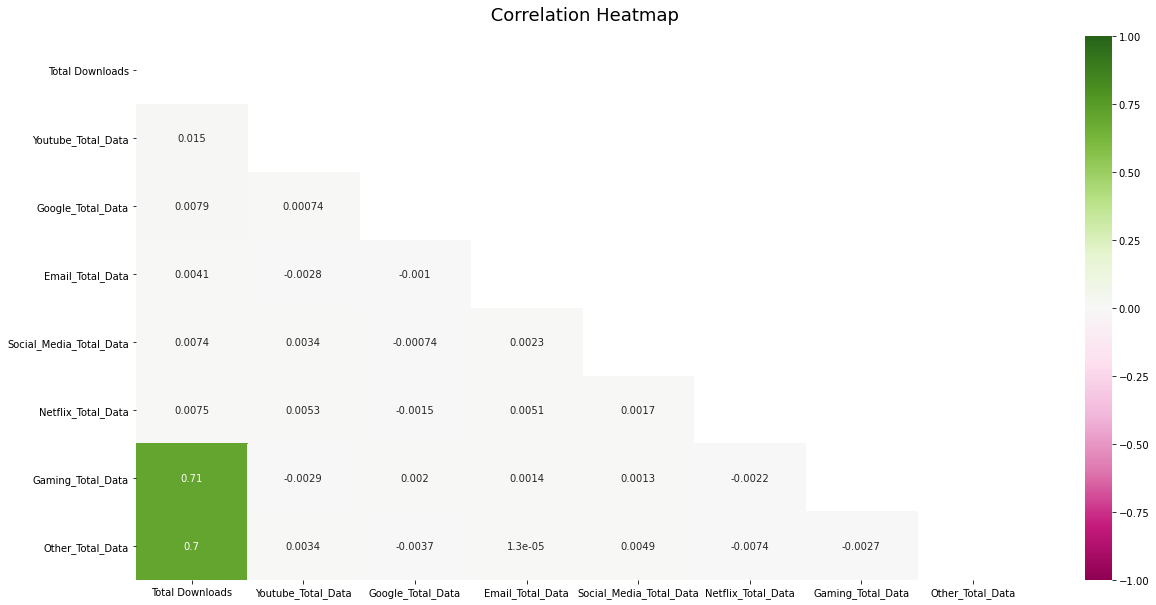

In [128]:
plt.figure(figsize=(20, 10))

mask = np.triu(np.ones_like(heat_map, dtype=np.bool))
heatmap = sns.heatmap(heat_map, mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title(' Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### The data which has more correlation to Total Downloads is Gaming data since its value is most closer to 1

In [148]:
correlation = correlation.corr(method='pearson')

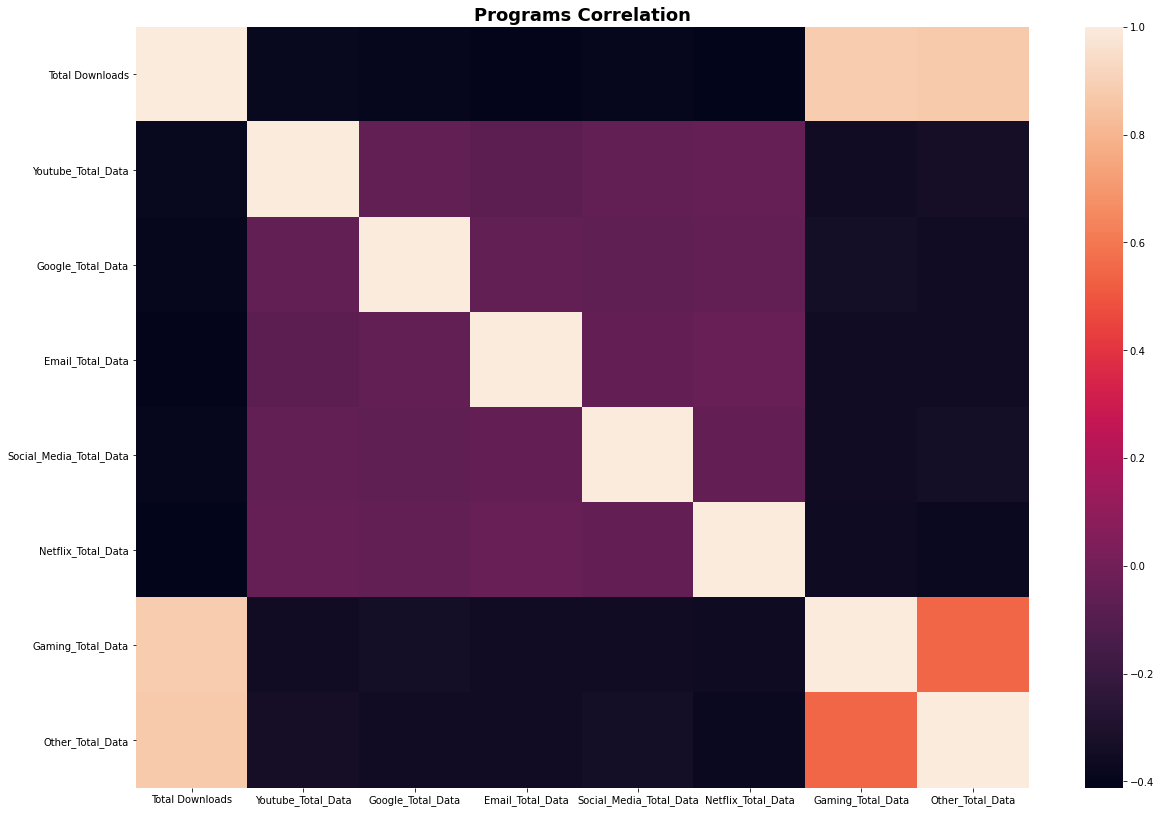

In [150]:
draw.plot_heatmap_from_correlation(correlation, "Programs Correlation")

# Transformation

In [139]:
dec_new = dfExp.groupby(pd.qcut(dfExp['Activity_Duration(ms)'], 15))['Activity_Duration(ms)'].sum()
Dec_sorted = dec_new.sort_values(ascending=False)
#show the top 5 deciles
Dec_sorted.head(5)

Activity_Duration(ms)
(11774.261, 219426.4]    2.189544e+08
(4549.865, 11774.261]    5.292961e+07
(2070.475, 4549.865]     2.223762e+07
(962.571, 2070.475]      1.030097e+07
(407.005, 962.571]       4.674623e+06
Name: Activity_Duration(ms), dtype: float64

In [142]:
#basically means that qcut tries to divide up the underlying data into equal sized bins
dfExp['Dec_sorted'] = pd.qcut(dfExp['Activity_Duration(ms)'], 15, labels=False)

In [145]:
fresh_data = dfExp.loc[:,['Dec_sorted','Total Uploads','Total Downloads']]
fresh_data = fresh_data.groupby('Dec_sorted')['Total Uploads','Total Downloads'].sum()
fresh_data= fresh_data[fresh.index >= 5]
fresh_data['Total UL DL (MB)'] = fresh_data['Total Uploads'] + fresh_data['Total Downloads']
fresh_data.head()

<ipython-input-145-936a866012ab>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fresh = fresh.groupby('Dec_sorted')['Total Uploads','Total Downloads'].sum()


,Total Uploads,Total Downloads,Total UL DL (MB)
Dec_sorted,,,
5,292293.673623,6.281275e+06,6.573569e+06
6,292264.344892,6.190981e+06,6.483245e+06
7,292882.894514,6.216403e+06,6.509285e+06
8,293850.659647,6.234851e+06,6.528701e+06
9,292433.231607,6.231001e+06,6.523434e+06
